ACLARO QUE NO SOY EL AUTOR DE ESTE CÓDIGO :D

In [2]:
# Importamos librerías para operaciones numéricas y graficación
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# MÉTODO DE LA BISECCIÓN PARA HALLAR UN CERO DE UNA FUNCIÓN CONTINUA EN [a,b]
def biseccion(a0,b0,Nmax,eps):
  # ENTRADAS
  # a0: extremo izquierdo original del intervalo
  # b0: extremo derecho original del intervalo
  # Nmax: número máximo de iteraciones permitidas
  # eps: precisión absoluta
  #
  # CONTROLAMOS LA CONDICIÓN DE LAS ENTRADAS
  if mi_funcion(a0)*mi_funcion(b0) >= 0.0:
    print('ERROR: Las imágenes f(a0) y f(b0) no tienen signos contrarios.')
    return (0.0,0,False,[])
  #
  # SALIDAS
  # x: aproximación a un cero de f
  # N: número de iteraciones realizadas
  # EXITO: bandera para saber si todo salió correctamente
  # sucesion: conjunto de todas las aproximaciones calculadas en el algoritmo
  # Inicializamos
  x = (a0+b0)/2
  EXITO = False
  N = 0
  # copio a0 y b0 para evitar modificar los valores de a0 y b0 externamente
  a = a0
  b = b0
  # inicializo la sucesión de aproximaciones
  sucesion = []
  # Bloque de iteración
  while (not EXITO):
    # actualizo la solución
    x = (a + b)/2
    # guardo la nueva aproximación en la lista
    sucesion.append(x)
    # actualizo las iteraciones
    N = N+1
    if N>Nmax:
      break
    # Evalúo la función en todos los valores a,b y x
    fa = mi_funcion(a)
    fb = mi_funcion(b)
    fx = mi_funcion(x)
    fax = fa*fx
    # verifico el signo de f(a)*f(x)
    # CASO NEGATIVO
    if fax < 0.0:
      # Hay un cero entre a y x
      # Cambio el extremo derecho del intervalo
      b = x
    # CASO POSITIVO
    if fax > 0.0:
      # Hay un cero entre x y b
      # Cambio el extremo izquierdo del intervalo
      a = x
    # CASO CERO o PRECISIÓN ALCANZADA
    if fax==0.0 or (b-a)<eps:
      # Ya encontramos un cero, que es x
      EXITO = True

  # retorno las salidas deseadas
  return (x,N,EXITO,sucesion)



# MÉTODO DE LA FALSA POSICIÓN PARA HALLAR UN CERO DE UNA FUNCIÓN CONTINUA EN [a,b]
def falsa_posicion(a0,b0,Nmax,eps):
  # ENTRADAS
  # a0: extremo izquierdo original del intervalo
  # b0: extremo derecho original del intervalo
  # Nmax: número máximo de iteraciones permitidas
  # eps: precisión absoluta
  #
  # CONTROLAMOS LA CONDICIÓN DE LAS ENTRADAS
  if mi_funcion(a0)*mi_funcion(b0) >= 0.0:
    print('ERROR: Las imágenes f(a0) y f(b0) no tienen signos contrarios.')
    return (0.0,0,False,[])
  #
  # SALIDAS
  # x: aproximación a un cero de f
  # N: número de iteraciones realizadas
  # EXITO: bandera para saber si todo salió correctamente
  # sucesion: conjunto de todas las aproximaciones calculadas en el algoritmo
  # Inicializamos
  x = (a0+b0)/2
  EXITO = False
  N = 0
  # copio a0 y b0 para evitar modificar los valores de a0 y b0 externamente
  a = a0
  b = b0
  # inicializo la sucesión de aproximaciones
  sucesion = []
  # Bloque de iteración
  while (not EXITO):
    # actualizo la solución
    # ESTA ES LA ÚNICA DIFERENCIA CON LA BISECCIÓN
    fa = mi_funcion(a)
    fb = mi_funcion(b)
    x = (b*fa-a*fb)/(fa-fb)
    # guardo la nueva aproximación en la lista
    sucesion.append(x)
    # actualizo las iteraciones
    N = N+1
    if N>Nmax:
      break
    # Evalúo la función en todos los valores a,b y x

    fx = mi_funcion(x)
    fax = fa*fx
    # verifico el signo de f(a)*f(x)
    # CASO NEGATIVO
    if fax < 0.0:
      # Hay un cero entre a y x
      # Cambio el extremo derecho del intervalo
      b = x
    # CASO POSITIVO
    if fax > 0.0:
      # Hay un cero entre x y b
      # Cambio el extremo izquierdo del intervalo
      a = x
    # CASO CERO o PRECISIÓN ALCANZADA
    if N>1:
      variacion = np.abs(sucesion[-1] - sucesion[-2]) # diferencia entre las dos últimas aproximaciones
    else:
      variacion = 1.0
    if fax==0.0 or variacion<eps:
      # Ya encontramos un cero, que es x
      EXITO = True

  # retorno las salidas deseadas
  return (x,N,EXITO,sucesion)



  # MÉTODO DE LA SECANTE PARA HALLAR UN CERO DE UNA FUNCIÓN CONTINUA
def secante(x0,x1,Nmax,eps):
  # ENTRADAS
  # x0: primera aproximación inicial
  # x1: segunda aproximación inicial
  # Nmax: número máximo de iteraciones permitidas
  # eps: precisión absoluta
  #
  #
  # SALIDAS
  # x: aproximación a un cero de f
  # N: número de iteraciones realizadas
  # EXITO: bandera para saber si todo salió correctamente
  # sucesion: conjunto de todas las aproximaciones calculadas en el algoritmo
  # Inicializamos
  x = (a0+b0)/2
  EXITO = False
  N = 0
  # copio x0 y x1 para evitar modificar los valores de x0 y x1 externamente
  a = x0
  b = x1
  # inicializo la sucesión de aproximaciones
  sucesion = [x0,x1]
  # Bloque de iteración
  while (not EXITO):
    # actualizo la solución
    # ESTA ES IGUAL A FALSA POSICIÓN
    fa = mi_funcion(a)
    fb = mi_funcion(b)
    x = (b*fa-a*fb)/(fa-fb)
    # guardo la nueva aproximación en la lista
    sucesion.append(x)
    # actualizo las iteraciones
    N = N+1
    if N>Nmax:
      break
    # Evalúo la función en todos los valores a,b y x
    fx = mi_funcion(x)
    # REIVOS SI PRECISIÓN FUE ALCANZADA
    if N>1:
      variacion = np.abs(sucesion[-1] - sucesion[-2]) # diferencia entre las dos últimas aproximaciones
    else:
      variacion = 1.0
    if variacion<eps:
      # Ya encontramos un cero, que es x
      EXITO = True
    # aún no he encontrado el cero, sigo iterando
    # actualizo a y b
    a = b
    b = x

  # retorno las salidas deseadas
  return (x,N,EXITO,sucesion)

Punto B y C.i

In [8]:
#DEFINIR FUNCIÓN
def mi_funcion(x):
  return np.log(x**(3/2) + (1/5)*x)

In [9]:
# DATOS INICIALES

a0 = 1/2
b0 = 3/2
Nmax = 100
eps = 1e-13

In [11]:
#Imprimir resultados del método
(x,N_f,EXITO,sucesion_f) = falsa_posicion(a0,b0,Nmax,eps)
print('RESULTADOS FALSA POSICIÓN')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_f)

RESULTADOS FALSA POSICIÓN
La aproximación al cero es  =  0.8790582384109635
El número de iteraciones fue=  21
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [1.0100588397475276, 0.9085259286820286, 0.8857972261466971, 0.8806054169612335, 0.8794137706134069, 0.8791399545546938, 0.8790770210915549, 0.8790625557092983, 0.8790592307672848, 0.8790584665099989, 0.8790582908408853, 0.8790582504622809, 0.8790582411810149, 0.8790582390476599, 0.8790582385572955, 0.8790582384445822, 0.8790582384186744, 0.8790582384127192, 0.8790582384113504, 0.8790582384110357, 0.8790582384109635]


In [12]:
#Aprox a cero o sea f(x) = 0 con x encontrado
mi_funcion(x)

3.4638958368304285e-14

In [13]:
# |X - X_n|
var_falsa_posicion =   np.abs( np.diff(sucesion_f) )

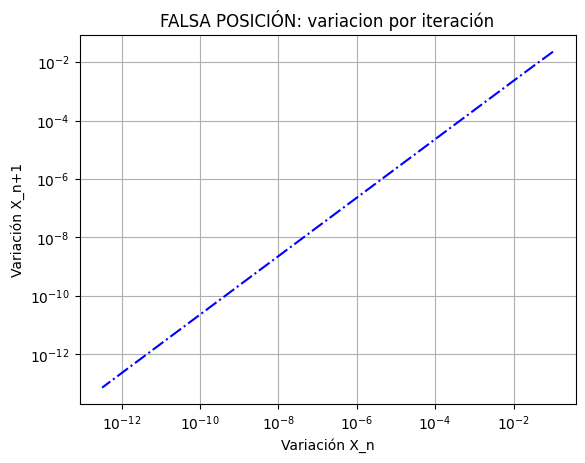

In [14]:
x = var_falsa_posicion[:-1] # guardo todas las variaciones excepto la última
y = var_falsa_posicion[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
plt.title('FALSA POSICIÓN: variacion por iteración')
plt.xlabel('Variación X_n')
plt.ylabel('Variación X_n+1')
plt.grid(True)

D

In [15]:
if len(var_falsa_posicion) >= 3:
    alpha_exp = (np.log(var_falsa_posicion[-1]) - np.log(var_falsa_posicion[-2])) / (np.log(var_falsa_posicion[-2]) - np.log(var_falsa_posicion[-3]))
    L_Exp = abs(var_falsa_posicion[-1]) / (abs(var_falsa_posicion[-2]) ** alpha_exp)

    print('Alpha experimental tiene valor de: ', alpha_exp)
    print('L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Alpha experimental tiene valor de:  1.001981464892543
L experimental tiene valor de:  0.24273513324244475


Punto B y C.ii

In [1]:
#DEFINIR FUNCIÓN
def mi_funcion(x):
  return 10 * np.sin(x + 1) + np.sin(10 * x)
# DATOS INICIALES
a0 = 0
b0 = 5
Nmax = 100
eps = 1e-13

In [2]:
# DATOS INICIALES
a0 = 0
b0 = 5
Nmax = 100
eps = 1e-13

In [7]:
#Imprimir resultados del método
(x,N_f,EXITO,sucesion_f) = falsa_posicion(a0,b0,Nmax,eps)
print('RESULTADOS FALSA POSICIÓN')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_f)

RESULTADOS FALSA POSICIÓN
La aproximación al cero es  =  2.170154127102026
El número de iteraciones fue=  12
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [3.667742144723415, 1.6026279235958143, 2.2380830207546283, 2.0995735833265976, 2.1665862019409947, 2.170111569431149, 2.170153705071596, 2.1701541229270367, 2.170154127060725, 2.1701541271016174, 2.1701541271020224, 2.170154127102026]


In [8]:
#Aprox a cero o sea f(x) = 0 con x encontrado
mi_funcion(x)

4.052314039881821e-15

In [9]:
# |X - X_n|
var_falsa_posicion =   np.abs( np.diff(sucesion_f) )

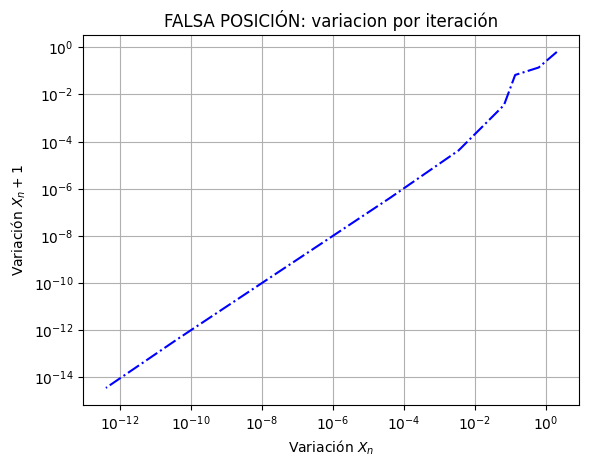

In [12]:
x = var_falsa_posicion[:-1] # guardo todas las variaciones excepto la última
y = var_falsa_posicion[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
plt.title('FALSA POSICIÓN: variacion por iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n+1$')
plt.grid(True)

In [13]:
if len(var_falsa_posicion) >= 3:
    alpha_exp = (np.log(var_falsa_posicion[-1]) - np.log(var_falsa_posicion[-2])) / (np.log(var_falsa_posicion[-2]) - np.log(var_falsa_posicion[-3]))
    L_Exp = abs(var_falsa_posicion[-1]) / (abs(var_falsa_posicion[-2]) ** alpha_exp)

    print('Alpha experimental tiene valor de: ', alpha_exp)
    print('L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Alpha experimental tiene valor de:  1.02630990687522
L experimental tiene valor de:  0.018584102361412513


Punto B y C iii


In [147]:
# Definir la función
def mi_funcion(x):
    return (np.exp(x) - 1)**2 * np.cbrt(np.tan(x/8))

In [148]:
# DATOS INICIALES
a0 = -2
b0 = 1
Nmax = 295 #ojo CAMBIAR
eps = 1e-13

In [160]:
#Imprimir resultados del método
(x,N_f,EXITO,sucesion_f) = falsa_posicion(a0,b0,Nmax,eps)
print('RESULTADOS FALSA POSICIÓN')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_f)

RESULTADOS FALSA POSICIÓN
La aproximación al cero es  =  -0.02529042298090392
El número de iteraciones fue=  296
La bandera EXITO tiene valor  False
La historia de aproximaciones es: [-1.27145280530585, -0.908469969045728, -0.7088392085806057, -0.5854891923079986, -0.5020012264749073, -0.4416302838773294, -0.395807575990301, -0.3597340755183076, -0.33052090550382707, -0.3063258892669849, -0.28591830271604524, -0.2684438950388387, -0.2532905597369948, -0.24000776243657834, -0.22825620101219582, -0.21777523558168227, -0.20836116869160232, -0.19985237375190157, -0.19211887326119798, -0.18505488354238978, -0.17857338279920548, -0.17260208766126273, -0.16708042840033255, -0.16195724410793613, -0.15718900480345843, -0.152738424545998, -0.14857336837161356, -0.14466598260652408, -0.1409919968252759, -0.1375301590155165, -0.1342617750730401, -0.13117033071195033, -0.1282411789992274, -0.12546128053466715, -0.12281898615999293, -0.1203038542507511, -0.11790649630322778, -0.11561844580670677, -0

In [161]:
#Aprox a cero o sea f(x) = 0 con x encontrado
mi_funcion(x)

-9.153229683296748e-05

In [151]:
# |X - X_n|
var_falsa_posicion =   np.abs( np.diff(sucesion_f) )

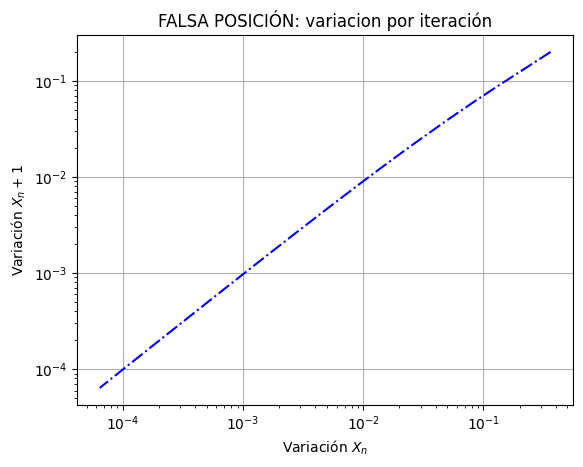

In [152]:
x = var_falsa_posicion[:-1] # guardo todas las variaciones excepto la última
y = var_falsa_posicion[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
plt.title('FALSA POSICIÓN: variacion por iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n+1$')
plt.grid(True)

In [153]:
if len(var_falsa_posicion) >= 3:
    alpha_exp = (np.log(var_falsa_posicion[-1]) - np.log(var_falsa_posicion[-2])) / (np.log(var_falsa_posicion[-2]) - np.log(var_falsa_posicion[-3]))
    L_Exp = abs(var_falsa_posicion[-1]) / (abs(var_falsa_posicion[-2]) ** alpha_exp)

    print('Alpha experimental tiene valor de: ', alpha_exp)
    print('L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Alpha experimental tiene valor de:  0.9966208037607218
L experimental tiene valor de:  0.9622119057924007


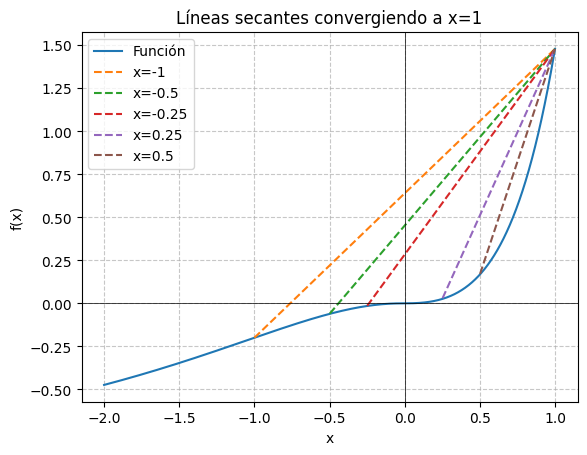

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def mi_funcion(x):
    return (np.exp(x) - 1)**2 * np.cbrt(np.tan(x/8))

# Puntos x donde se trazarán las líneas secantes
puntos_x = [-1, -0.5, -0.25, 0.25, 0.5]

# Coordenadas de los puntos de intersección de las secantes con x = 1
punto_interseccion_x1 = 1
punto_interseccion_y1 = mi_funcion(1)

# Obtener las pendientes de las secantes
pendientes = [(punto_interseccion_y1 - mi_funcion(x)) / (punto_interseccion_x1 - x) for x in puntos_x]

# Graficar la función
x_vals = np.linspace(-2, 1, 1000)
y_vals = mi_funcion(x_vals)
plt.plot(x_vals, y_vals, label='Función')

# Graficar las líneas secantes desde los puntos x especificados hasta x = 1
for x, m in zip(puntos_x, pendientes):
    secante = lambda z: mi_funcion(x) + m * (z - x)
    plt.plot(x_vals[x_vals >= x], secante(x_vals[x_vals >= x]), '--', label=f'x={x}')

# Agregar plano cartesiano y cuadrícula
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Líneas secantes convergiendo a x=1')
plt.legend()
plt.show()




EJERCICIO 3


BISECCIÓN i

In [201]:
def mi_funcion(x):
  return np.log(x**(3/2) + (1/5)*x)
  # DATOS INICIALES

a0 = 1/2
b0 = 3/2
Nmax = 100
eps = 1e-13

In [184]:
(x,N_f,EXITO,sucesion_b) = biseccion(a0,b0,Nmax,eps)
print('RESULTADOS BISECCIÓN')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_b)

RESULTADOS BISECCIÓN
La aproximación al cero es  =  0.8790582384108916
El número de iteraciones fue=  44
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [1.0, 0.75, 0.875, 0.9375, 0.90625, 0.890625, 0.8828125, 0.87890625, 0.880859375, 0.8798828125, 0.87939453125, 0.879150390625, 0.8790283203125, 0.87908935546875, 0.879058837890625, 0.8790435791015625, 0.8790512084960938, 0.8790550231933594, 0.8790569305419922, 0.8790578842163086, 0.8790583610534668, 0.8790581226348877, 0.8790582418441772, 0.8790581822395325, 0.8790582120418549, 0.879058226943016, 0.8790582343935966, 0.879058238118887, 0.8790582399815321, 0.8790582390502095, 0.8790582385845482, 0.8790582383517176, 0.8790582384681329, 0.8790582384099253, 0.8790582384390291, 0.8790582384244772, 0.8790582384172012, 0.8790582384135632, 0.8790582384117442, 0.8790582384108347, 0.8790582384112895, 0.8790582384110621, 0.8790582384109484, 0.8790582384108916]


In [200]:
# |X - X_n|
var_falsa_posicion =   np.abs( np.diff(sucesion_b) )
if len(var_biseccion) >= 3:
    alpha_exp = (np.log(var_biseccion[-1]) - np.log(var_biseccion[-2])) / (np.log(var_biseccion[-2]) - np.log(var_biseccion[-3]))
    L_Exp = abs(var_biseccion[-1]) / (abs(var_biseccion[-2]) ** alpha_exp)

    print('Mi alpha experimental tiene valor de: ', alpha_exp)
    print('Mi L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Mi alpha experimental tiene valor de:  1.000000000000005
Mi L experimental tiene valor de:  0.500000000000075


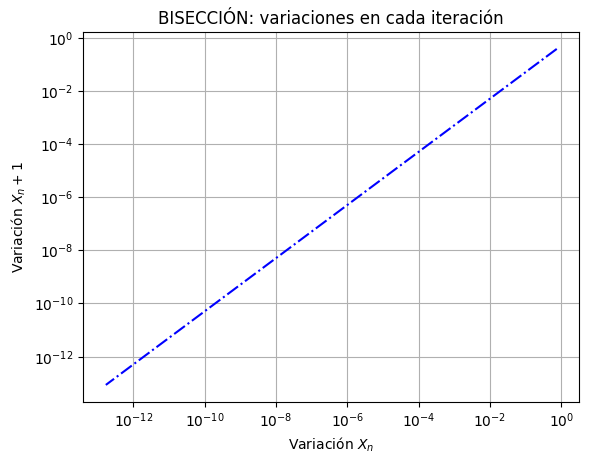

In [239]:
var_biseccion =   np.abs( np.diff(sucesion_b) )

x = var_biseccion[:-1] # guardo todas las variaciones excepto la última
y = var_biseccion[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
#plt.legend(('Error numérico','Variación'))
plt.title('BISECCIÓN: variaciones en cada iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n+1$')
plt.grid(True)

BISECCIÓN ii

In [188]:
#DEFINIR FUNCIÓN
def mi_funcion(x):
  return 10 * np.sin(x + 1) + np.sin(10 * x)
# DATOS INICIALES
a0 = 0
b0 = 5
Nmax = 100
eps = 1e-13

In [189]:
(x,N_f,EXITO,sucesion_b) = biseccion(a0,b0,Nmax,eps)
print('RESULTADOS BISECCIÓN')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_b)

RESULTADOS BISECCIÓN
La aproximación al cero es  =  2.1701541271020375
El número de iteraciones fue=  46
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [2.5, 1.25, 1.875, 2.1875, 2.03125, 2.109375, 2.1484375, 2.16796875, 2.177734375, 2.1728515625, 2.17041015625, 2.169189453125, 2.1697998046875, 2.17010498046875, 2.170257568359375, 2.1701812744140625, 2.1701431274414062, 2.1701622009277344, 2.1701526641845703, 2.1701574325561523, 2.1701550483703613, 2.170153856277466, 2.1701544523239136, 2.1701541543006897, 2.1701540052890778, 2.1701540797948837, 2.1701541170477867, 2.170154135674238, 2.1701541263610125, 2.1701541310176253, 2.170154128689319, 2.1701541275251657, 2.170154126943089, 2.1701541272341274, 2.170154127088608, 2.170154127161368, 2.170154127124988, 2.170154127106798, 2.170154127097703, 2.1701541271022506, 2.170154127099977, 2.1701541271011138, 2.170154127101682, 2.1701541271019664, 2.1701541271021085, 2.1701541271020375]


In [196]:
# |X - X_n|
var_falsa_posicion =   np.abs( np.diff(sucesion_b) )
if len(var_biseccion) >= 3:
    alpha_exp = (np.log(var_biseccion[-1]) - np.log(var_biseccion[-2])) / (np.log(var_biseccion[-2]) - np.log(var_biseccion[-3]))
    L_Exp = abs(var_biseccion[-1]) / (abs(var_biseccion[-2]) ** alpha_exp)

    print('Mi alpha experimental tiene valor de: ', alpha_exp)
    print('Mi L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Mi alpha experimental tiene valor de:  1.000000000000005
Mi L experimental tiene valor de:  0.500000000000075


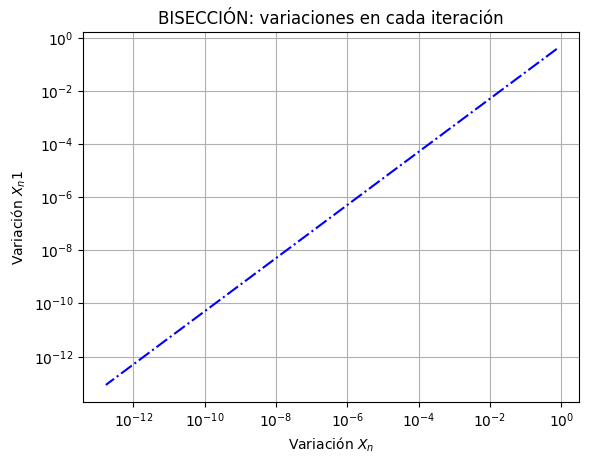

In [238]:
var_biseccion =   np.abs( np.diff(sucesion_b) )

x = var_biseccion[:-1] # guardo todas las variaciones excepto la última
y = var_biseccion[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
#plt.legend(('Error numérico','Variación'))
plt.title('BISECCIÓN: variaciones en cada iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n$1')
plt.grid(True)

BISECCIÓN iii.

In [193]:
# Definir la función
def mi_funcion(x):
    return (np.exp(x) - 1)**2 * np.cbrt(np.tan(x/8))

# DATOS INICIALES
a0 = -2
b0 = 1
Nmax = 295 #ojo CAMBIAR
eps = 1e-13

In [194]:
(x,N_f,EXITO,sucesion_b) = biseccion(a0,b0,Nmax,eps)
print('RESULTADOS BISECCIÓN')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_b)

RESULTADOS BISECCIÓN
La aproximación al cero es  =  -2.842170943040401e-14
El número de iteraciones fue=  45
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [-0.5, 0.25, -0.125, 0.0625, -0.03125, 0.015625, -0.0078125, 0.00390625, -0.001953125, 0.0009765625, -0.00048828125, 0.000244140625, -0.0001220703125, 6.103515625e-05, -3.0517578125e-05, 1.52587890625e-05, -7.62939453125e-06, 3.814697265625e-06, -1.9073486328125e-06, 9.5367431640625e-07, -4.76837158203125e-07, 2.384185791015625e-07, -1.1920928955078125e-07, 5.960464477539063e-08, -2.9802322387695312e-08, 1.4901161193847656e-08, -7.450580596923828e-09, 3.725290298461914e-09, -1.862645149230957e-09, 9.313225746154785e-10, -4.656612873077393e-10, 2.3283064365386963e-10, -1.1641532182693481e-10, 5.820766091346741e-11, -2.9103830456733704e-11, 1.4551915228366852e-11, -7.275957614183426e-12, 3.637978807091713e-12, -1.8189894035458565e-12, 9.094947017729282e-13, -4.547473508864641e-13, 2.2737367544323206e-13, -1.13686

In [197]:
# |X - X_n|
var_falsa_posicion =   np.abs( np.diff(sucesion_b) )
if len(var_biseccion) >= 3:
    alpha_exp = (np.log(var_biseccion[-1]) - np.log(var_biseccion[-2])) / (np.log(var_biseccion[-2]) - np.log(var_biseccion[-3]))
    L_Exp = abs(var_biseccion[-1]) / (abs(var_biseccion[-2]) ** alpha_exp)

    print('Mi alpha experimental tiene valor de: ', alpha_exp)
    print('Mi L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Mi alpha experimental tiene valor de:  1.000000000000005
Mi L experimental tiene valor de:  0.500000000000075


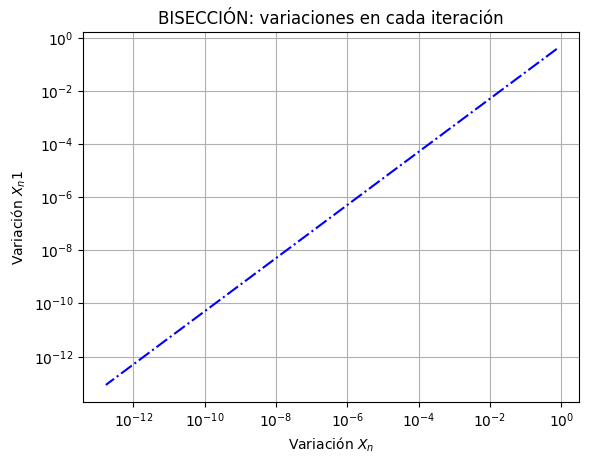

In [237]:
var_biseccion =   np.abs( np.diff(sucesion_b) )

x = var_biseccion[:-1] # guardo todas las variaciones excepto la última
y = var_biseccion[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
#plt.legend(('Error numérico','Variación'))
plt.title('BISECCIÓN: variaciones en cada iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n$1')
plt.grid(True)

SECANTE i

In [42]:
def mi_funcion(x):
  return np.log(x**(3/2) + (1/5)*x)
  # DATOS INICIALES

x0 = 1/2
x1 = 3/2
Nmax = 100
eps = 1e-13

In [43]:
(x,N_f,EXITO,sucesion_s) = secante(x0,x1,Nmax,eps)
print('RESULTADOS SECANTE')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_s)

RESULTADOS SECANTE
La aproximación al cero es  =  0.879058238410942
El número de iteraciones fue=  8
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [0.5, 1.5, 1.0100588397475276, 0.8390427696374035, 0.881918321723801, 0.8791221265555837, 0.8790581372011672, 0.8790582384145255, 0.8790582384109419, 0.879058238410942]


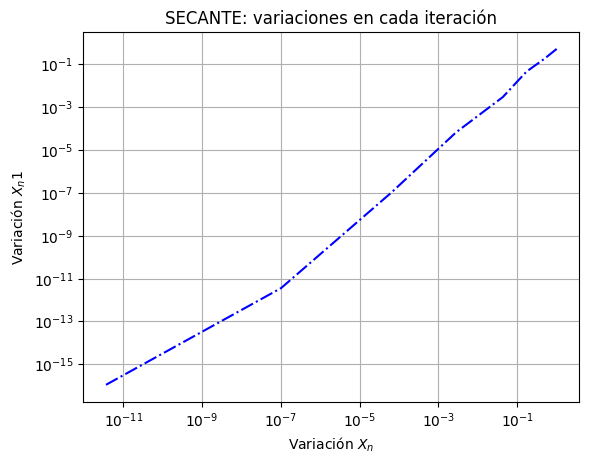

In [44]:
var_secante =   np.abs( np.diff(sucesion_s) )

x = var_secante[:-1] # guardo todas las variaciones excepto la última
y = var_secante[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
#plt.legend(('Error numérico','Variación'))
plt.title('SECANTE: variaciones en cada iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n$1')
plt.grid(True)

In [45]:
if len(var_secante) >= 3:
    alpha_exp = (np.log(var_secante[-1]) - np.log(var_secante[-2])) / (np.log(var_secante[-2]) - np.log(var_secante[-3]))
    L_Exp = abs(var_secante[-1]) / (abs(var_secante[-2]) ** alpha_exp)

    print('Mi alpha experimental tiene valor de: ', alpha_exp)
    print('Mi L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Mi alpha experimental tiene valor de:  1.0130277822342535
Mi L experimental tiene valor de:  4.3672218120454646e-05


SECANTE ii

In [46]:
#DEFINIR FUNCIÓN
def mi_funcion(x):
  return 10 * np.sin(x + 1) + np.sin(10 * x)
# DATOS INICIALES
x0 = 0
x1 = 5
Nmax = 100
eps = 1e-13

In [47]:
(x,N_f,EXITO,sucesion_s) = secante(x0,x1,Nmax,eps)
print('RESULTADOS SECANTE')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_s)

RESULTADOS SECANTE
La aproximación al cero es  =  5.183019744462296
El número de iteraciones fue=  11
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [0, 5, 3.667742144723415, 5.5229676557121055, 5.309956237572509, 5.164642010663876, 5.202455598414337, 5.184790055903617, 5.182830176851306, 5.183021417022643, 5.183019746028583, 5.183019744462284, 5.183019744462296]


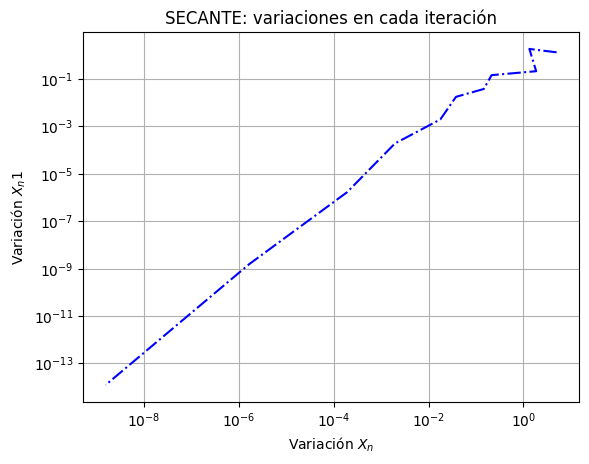

In [48]:
var_secante =   np.abs( np.diff(sucesion_s) )

x = var_secante[:-1] # guardo todas las variaciones excepto la última
y = var_secante[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
#plt.legend(('Error numérico','Variación'))
plt.title('SECANTE: variaciones en cada iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n$1')
plt.grid(True)

In [49]:
if len(var_secante) >= 3:
    alpha_exp = (np.log(var_secante[-1]) - np.log(var_secante[-2])) / (np.log(var_secante[-2]) - np.log(var_secante[-3]))
    L_Exp = abs(var_secante[-1]) / (abs(var_secante[-2]) ** alpha_exp)

    print('Mi alpha experimental tiene valor de: ', alpha_exp)
    print('Mi L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Mi alpha experimental tiene valor de:  1.6843056995337777
Mi L experimental tiene valor de:  8.416877133915383


SECANTE iii

In [50]:
# Definir la función
def mi_funcion(x):
    return (np.exp(x) - 1)**2 * np.cbrt(np.tan(x/8))

# DATOS INICIALES
x0 = -2
x1 = 1
Nmax = 100
eps = 1e-13

In [51]:
(x,N_f,EXITO,sucesion_s) = secante(x0,x1,Nmax,eps)
print('RESULTADOS SECANTE')
print('La aproximación al cero es  = ',x)
print('El número de iteraciones fue= ',N_f)
print('La bandera EXITO tiene valor ',EXITO)
print('La historia de aproximaciones es:', sucesion_s)

RESULTADOS SECANTE
La aproximación al cero es  =  -1.9577843676168325e-13
El número de iteraciones fue=  75
La bandera EXITO tiene valor  True
La historia de aproximaciones es: [-2, 1, -1.27145280530585, -0.908469969045728, -0.33054115567194564, -0.22163444083142483, -0.1372538072383328, -0.09086098495364675, -0.05996947559792631, -0.04013423419205935, -0.02693547077504562, -0.018152196761391966, -0.012255642067806745, -0.008287498063782133, -0.005609325526475932, -0.003799165904258705, -0.0025742665031004293, -0.0017448121713290908, -0.00118285236935521, -0.0008019948131674925, -0.0005438166103990006, -0.0003687741585409341, -0.0002500845362832983, -0.0001695999202736955, -0.00011501987342235978, -7.800561207896342e-05, -5.2903291352718716e-05, -3.5879151750034345e-05, -2.433343534272699e-05, -1.650311383277653e-05, -1.1192553662795765e-05, -7.5908958347244075e-06, -5.148221880150077e-06, -3.4915779018705436e-06, -2.3680255829422025e-06, -1.6060207847871475e-06, -1.0892210177313818e-0

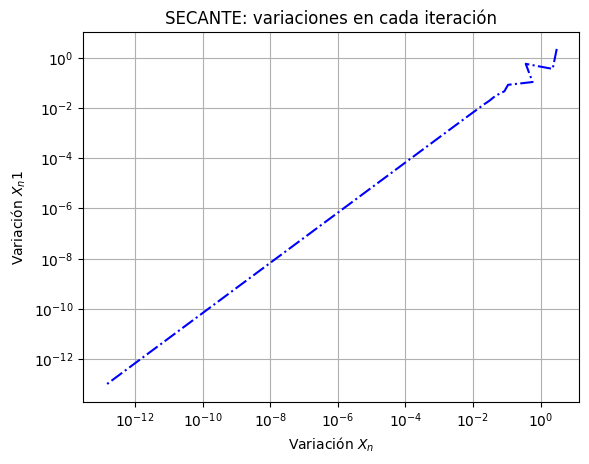

In [52]:
var_secante =   np.abs( np.diff(sucesion_s) )

x = var_secante[:-1] # guardo todas las variaciones excepto la última
y = var_secante[1:] # guardo todas las variaciones excepto la primera
plt.loglog(x,y,'-.b')
#plt.legend(('Error numérico','Variación'))
plt.title('SECANTE: variaciones en cada iteración')
plt.xlabel('Variación $X_n$')
plt.ylabel('Variación $X_n$1')
plt.grid(True)

In [53]:
if len(var_secante) >= 3:
    alpha_exp = (np.log(var_secante[-1]) - np.log(var_secante[-2])) / (np.log(var_secante[-2]) - np.log(var_secante[-3]))
    L_Exp = abs(var_secante[-1]) / (abs(var_secante[-2]) ** alpha_exp)

    print('Mi alpha experimental tiene valor de: ', alpha_exp)
    print('Mi L experimental tiene valor de: ', L_Exp)
else:
    print("La lista var_falsa_posicion no tiene suficientes elementos.")

Mi alpha experimental tiene valor de:  0.9978928645095496
Mi L experimental tiene valor de:  0.6375710454919414
